## Imports

__os__: manage filesystem  
__numpy__: vector computation  
__pyplot__: data visualisation  
__preprocessing.image__: image preprocessing  
__google.colab.drive__: manage drive data  
__seaborn__: data visualisation  
__imagesize__: get size image with a low computation price  
__pandas__: data manipulation  
__plotly__: data visualisation + interactivity

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import drive
import seaborn as sns
import imagesize
import pandas as pd
import plotly.express as px


%matplotlib inline


sns.set_theme(style="white", context="talk")



## Mount

We acess our data present on google drive to the notebook

In [ ]:
drive.mount('/content/drive/', force_remount=True)
train_path = ('/content/drive/MyDrive/chest_Xray/chest_Xray/train')
test_path = ('/content/drive/MyDrive/chest_Xray/chest_Xray/test')
val_path = ('/content/drive/MyDrive/chest_Xray/chest_Xray/val')

Mounted at /content/drive/


## Count images dataset

We count our images by category.  
We notice an inbalance: we have __more pneumonia data than normal data__.


    train_normal_imgs count: 1341
    train_pneumo_imgs count: 3875

    test_normal_imgs count: 234
    test_pneumo_imgs count: 390

    val_normal_imgs count: 8
    val_pneumo_imgs count: 8



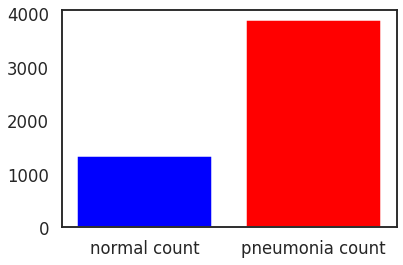

In [ ]:
train_normal_imgs = [fn for fn in os.listdir(f'{train_path}/NORMAL') if fn.endswith('.jpeg')]
train_pneumo_imgs = [fn for fn in os.listdir(f'{train_path}/PNEUMONIA') if fn.endswith('.jpeg')]

test_normal_imgs = [fn for fn in os.listdir(f'{test_path}/NORMAL') if fn.endswith('.jpeg')]
test_pneumo_imgs = [fn for fn in os.listdir(f'{test_path}/PNEUMONIA') if fn.endswith('.jpeg')]

val_normal_imgs = [fn for fn in os.listdir(f'{val_path}/NORMAL') if fn.endswith('.jpeg')]
val_pneumo_imgs = [fn for fn in os.listdir(f'{val_path}/PNEUMONIA') if fn.endswith('.jpeg')]

count_images = f"""
    train_normal_imgs count: {len(train_normal_imgs)}
    train_pneumo_imgs count: {len(train_pneumo_imgs)}

    test_normal_imgs count: {len(test_normal_imgs)}
    test_pneumo_imgs count: {len(test_pneumo_imgs)}

    val_normal_imgs count: {len(val_normal_imgs)}
    val_pneumo_imgs count: {len(val_pneumo_imgs)}
"""

names = ["normal count", "pneumonia count"]
values = [len(train_normal_imgs), len(train_pneumo_imgs)]
print(count_images)
plt.bar(names, values, color=["blue", "red"])
plt.show()

## Visualize random data

The purpose is to have a first glimpse.  
We notice size and brightness differences.

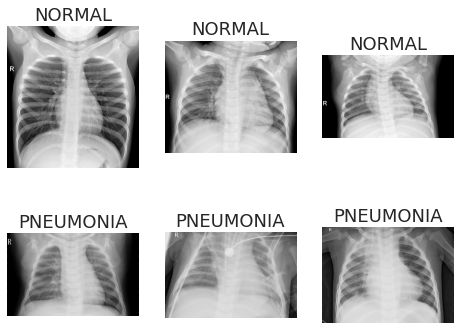

In [ ]:
# randomly select 3 of each
select_norm = np.random.choice(train_normal_imgs, 3, replace = False)
select_pneu = np.random.choice(train_pneumo_imgs, 3, replace = False)
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_path}/NORMAL/{select_norm[i]}'
        label = 'NORMAL'
    else:
        fp = f'{train_path}/PNEUMONIA/{select_pneu[i-3]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

## Sizes distribution

We notice huge variation of sizes for the test & train datasets.

In [ ]:
sizes_train_normal = []
sizes_train_pneumo = []

sizes_test_normal = []
sizes_test_pneumo = []

sizes_val_normal = []
sizes_val_pneumo = []

# get train sizes
for fn in train_normal_imgs:
  width, height = imagesize.get(f"{train_path}/NORMAL/{fn}")
  sizes_train_normal.append((width, height))

for fn in train_pneumo_imgs:
  width, height = imagesize.get(f"{train_path}/PNEUMONIA/{fn}")
  sizes_train_pneumo.append((width, height))


# get test sizes
for fn in test_normal_imgs:
  width, height = imagesize.get(f"{test_path}/NORMAL/{fn}")
  sizes_test_normal.append((width, height))

for fn in test_pneumo_imgs:
  width, height = imagesize.get(f"{test_path}/PNEUMONIA/{fn}")
  sizes_test_pneumo.append((width, height))


# get val sizes
for fn in val_normal_imgs:
  width, height = imagesize.get(f"{val_path}/NORMAL/{fn}")
  sizes_val_normal.append((width, height))

for fn in val_pneumo_imgs:
  width, height = imagesize.get(f"{val_path}/PNEUMONIA/{fn}")
  sizes_val_pneumo.append((width, height))


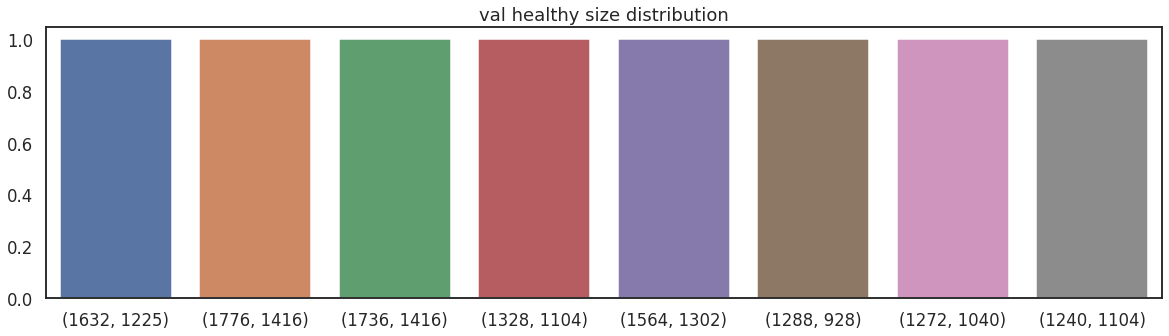

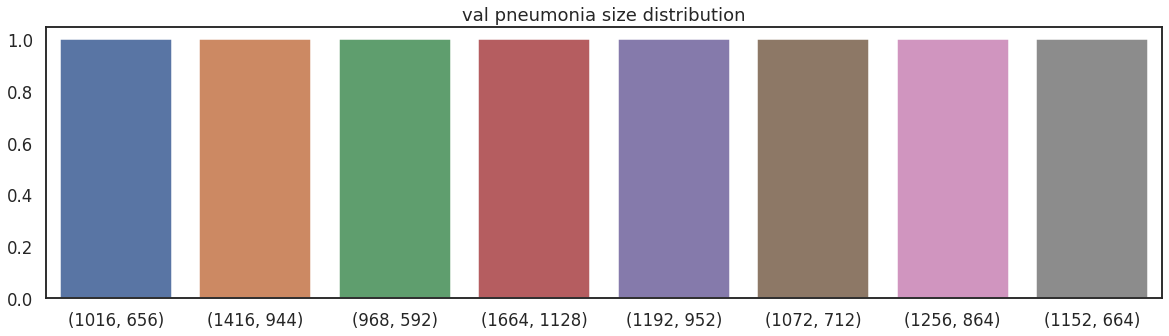

In [ ]:
# TODO
# - add couleur au dessus de la moyenne ou rgb pour les graph plotly
# - add conclusion to size markdown

df_train_normal = pd.DataFrame({'Shapes': sizes_train_normal})
train_normal_count = df_train_normal['Shapes'].value_counts()

df_train_pneumo = pd.DataFrame({'Shapes': sizes_train_pneumo})
train_pneumo_count = df_train_pneumo['Shapes'].value_counts()

df_test_normal = pd.DataFrame({'Shapes': sizes_test_normal})
test_normal_count = df_test_normal['Shapes'].value_counts()

df_test_pneumo = pd.DataFrame({'Shapes': sizes_test_pneumo})
test_pneumo_count = df_test_pneumo['Shapes'].value_counts()

df_val_normal = pd.DataFrame({'Shapes': sizes_val_normal})
val_normal_count = df_val_normal['Shapes'].value_counts()

df_val_pneumo = pd.DataFrame({'Shapes': sizes_val_pneumo})
val_pneumo_count = df_val_pneumo['Shapes'].value_counts()


df_train_normal = pd.DataFrame({"width": [size[0] for size in sizes_train_normal], "height": [size[1] for size in sizes_train_normal]})
df_train_pneumo = pd.DataFrame({"width": [size[0] for size in sizes_train_pneumo], "height": [size[1] for size in sizes_train_pneumo]})

df_test_normal = pd.DataFrame({"width": [size[0] for size in sizes_test_normal], "height": [size[1] for size in sizes_test_normal]})
df_test_pneumo = pd.DataFrame({"width": [size[0] for size in sizes_test_pneumo], "height": [size[1] for size in sizes_test_pneumo]})


# Plot train healthy size distribution
fig = px.scatter(df_train_normal, x="width", y="height", color="height", title="train healthy size distribution")
fig.show(config={'displaylogo': False})

# Plot train pneumonia size distribution
fig2 = px.scatter(df_train_pneumo, x="width", y="height", color="height", title="train pneumonia size distribution")
fig2.show(config={'displaylogo': False})

# Plot test healthy size distribution
fig3 = px.scatter(df_test_normal, x="width", y="height", color="height", title="test healthy size distribution")
fig3.show(config={'displaylogo': False})

# Plot test pneumonia size distribution
fig4 = px.scatter(df_test_pneumo, x="width", y="height", color="height", title="test pneumonia size distribution")
fig4.show(config={'displaylogo': False})


# PLot val healthy size distribution
plt.figure(figsize=(20, 5))
sns.barplot(x=val_normal_count.index, y=val_normal_count.values)
plt.title("val healthy size distribution")

# PLot val pneumonia size distribution
plt.figure(figsize=(20, 5))
sns.barplot(x=val_pneumo_count.index, y=val_pneumo_count.values)
plt.title("val pneumonia size distribution")

plt.show()


In [ ]:
print(f'''
  TOP 3 MOST PRESENT SIZES:
  train_normal: {train_normal_count.index.to_numpy()[:3]} - {train_normal_count.values[:3]} times
  train_pneumo:{train_pneumo_count.index.to_numpy()[:3]} - {train_pneumo_count.values[:3]} times
  test_normal: {test_normal_count.index.to_numpy()[:3]} - {test_normal_count.values[:3]} times
  test_pneumo: {test_pneumo_count.index.to_numpy()[:3]} - {test_pneumo_count.values[:3]} times
'''
)


  TOP 3 MOST PRESENT SIZES:
  train_normal: [(1836, 1592) (1480, 1228) (1962, 2169)] - [2 2 2] times
  train_pneumo:[(1072, 648) (1080, 728) (976, 672)] - [7 6 5] times
  test_normal: [(2517, 1979) (1168, 824) (1304, 952)] - [2 2 2] times
  test_pneumo: [(1112, 736) (1232, 888) (1160, 736)] - [3 2 2] times



## Images to matrices

We convert images to np.array() in order to make computation on each pixel.



In [ ]:

# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)) -> np.array :
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(f'{train_path}/NORMAL/', train_normal_imgs)
pnemonia_images = img2np(f'{train_path}/PNEUMONIA/', train_pneumo_imgs)

## Average Images

We compute the mean of all normal & all pneumia images.

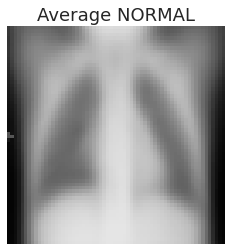

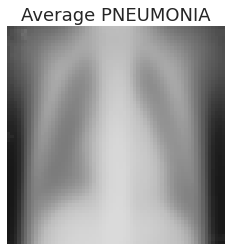

In [ ]:

def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')  

## Contrast

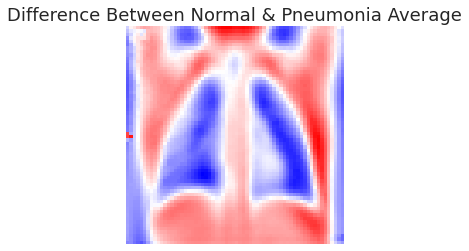

In [ ]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()

## Variability

For now, this has low interest because of inbalanced dataset(more pneumonia).

In [ ]:
std_norm = np.std(normal_images)
std_pneumonia = np.std(pnemonia_images)
print(f"standard deviation normal: {std_norm}\nstandard deviation pneumonia: {std_pneumonia}")

standard deviation normal: 63.01741409301758
standard deviation pneumonia: 59.72660827636719


## Eigenimages

__PCA__: https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales  
edit: pas tout compris la dessus encore

Number of PC:  28


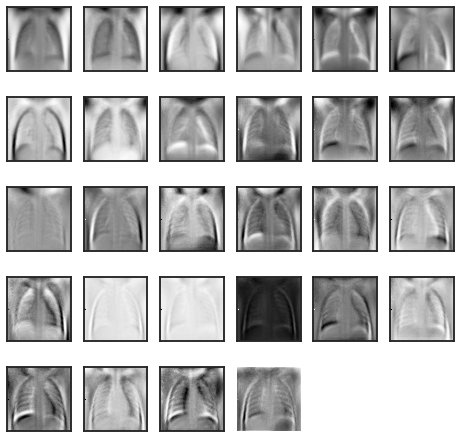

Number of PC:  14


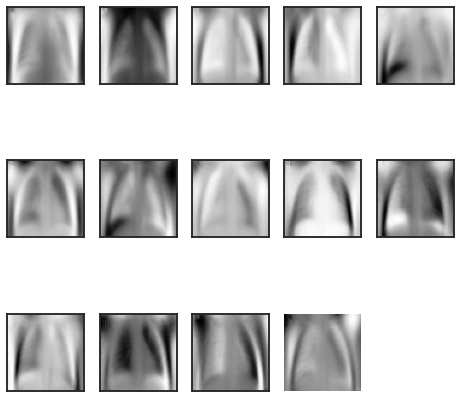

In [ ]:

from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(normal_images, 'NORMAL'))
plot_pca(eigenimages(pnemonia_images, 'PNEUMONIA'))